Objetivo: Realizar análise de Overlapping (sobreposição) entre as propriedades amostradas

add esquema


Bibliotecas utilizadas:

In [1]:
#requirements: pip install mysql-connector-python
import pandas as pd
import geopandas as gpd
import numpy as np
import psycopg2 as pg
import pandas.io.sql as sqlio
from shapely import wkb 
import folium
import os
from dataprep.eda import create_report
from pathlib import Path
import warnings
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Definindo as funções a serem utilizadas no restante do código

In [2]:
#1) Abrir arquivo shapefile
#2) Criar uma coluna com o nome do arquivo
#3) Mesclar todos os shapefiles a partir da lista criada no passo 2
def abrindo_shapefiles_e_criando_coluna_com_nome_do_arquivo(rootDir):
    """
    Objetivo: Função que abre todos os shapefiles de um diretório e cria uma coluna com o nome do arquivo
    Returns:
        Dataframe: Dataframe com todos os shapefiles abertos e com a coluna 'nome_arquivo'
    """   
    folder = Path(rootDir)
    data = []
    shapefiles = folder.glob("*.shp")
    for shp in shapefiles:
        #Lendo o shapefile
        gdf = gpd.read_file(shp)
        #Criando uma coluna com o nome do arquivo
        gdf['cod_imovel'] = os.path.basename(shp)
        ### Para cada linha na coluna 'cod_imovel', remover os 9 primeiros caracteres e os 4 últimos
        gdf['cod_imovel'] = gdf['cod_imovel'].str[:-4]
        gdf['cod_imovel'] = gdf['cod_imovel'].str[10:]
        #Adicionando o shapefile a uma lista
        data.append(gdf)
    return data

#3) Mesclar todos os shapefiles a partir da lista criada no passo 2
def unindo_dataframes(data):
    """
    Objetivo: Função que concatena todos os dataframes de uma lista
    Returns:
        _type_: _description_
    """ 
    df_final = pd.concat(data)
    #Selecting only the the rows in which the column 'codigo' is equal to 'AREA_IMOVEL'
    df_final = df_final[df_final['codigo'] == 'AREA_IMOVEL']
    df_final =  df_final.drop(['codigo', 'area', 'nome'], axis=1, inplace=False)
    print(df_final.info())
    
    #Municípios amostrados - Novo Repartimento(1505064), Pacajá(1505486), Anapu(1500859)
    #Cria nova coluna com o nome do município a partir do código do imóvel
    df_final.loc[df_final['cod_imovel'].str.contains('1505064'), 'nom_munici'] = 'Novo Repartimento'
    df_final.loc[df_final['cod_imovel'].str.contains('1505486'), 'nom_munici'] = 'Pacaja'
    df_final.loc[df_final['cod_imovel'].str.contains('1500859'), 'nom_munici'] = 'Anapu'

    
    #Exporting results of df_final variable to shapefile
    df_final.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/sicar_completo/limites_propriedades_novas_pt2.xlsx')
    df_final.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/sicar_completo/limites_propriedades_novas_pt2.shp', driver='ESRI Shapefile', crs='EPSG:4326')
    return df_final

### Mesclando e gerando o banco de dados Sicar completo
def mesclando_shapefiles(rootDir):
    """
    Objetivo: Função que abre todos os shapefiles de um diretório e mescla todos em um único shapefile
    Args:
        rootDir (Pathlike): Diretório onde estão os shapefiles a serem unidos
    Returns:
        Shapefile, variável, arquivo xlsx: Variável com todos os shapefiles unidos e arquivos em formato shapefile e excel
    """
    folder = Path(rootDir)
    shapefiles = folder.glob("*.shp")
    gdf = pd.concat([gpd.read_file(shp) for shp in shapefiles
    ]).pipe(gpd.GeoDataFrame)
    ### changin the crs of the gdf
    gdf.to_file(folder / 'Restauramazonia_imoveis_atualizado.shp', driver='ESRI Shapefile', crs='EPSG:4326')
    gdf.to_excel(folder / 'Restauramazonia_imoveis_atualizado.xlsx')
    return gdf


def categories_porcentagem_sobreposicao(row):
    if row['area_ha_sobreposicao_porcentagem_1'] >= 10 or row['area_ha_sobreposicao_porcentagem_2'] >= 10:
        return '1'
    else:
        return '0'
    
    
def analisando_maiores_que_500_ha(row):
    if row['area_ha_1'] > 500 or row['area_ha_2'] > 500:
        # area de overlap
        if row['area_ha_sobreposicao_porcentagem_1'] > 3 or row['area_ha_sobreposicao_porcentagem_2'] > 3:
            return '1'
        else:
            return '0'


### Montando banco de dados do sicar mais atualizado, fazendo o merge das novas propriedades

In [3]:

path_01 =  '/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/01_dataset/shp/sicar_para_merge_v02/'
abrindo_shapefiles_e_criando_coluna_com_nome_do_arquivo(path_01)

df_final = unindo_dataframes(abrindo_shapefiles_e_criando_coluna_com_nome_do_arquivo(path_01))
df_final.head(10)

# path = '/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/01_dataset/shp/sicar_para_karine/'
# df_final = mesclando_shapefiles(path)

print('Há neste banco de dados {} propriedades'.format(df_final.shape[0]))


Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7
Failed to auto identify EPSG: 7


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 3 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    14 non-null     geometry
 1   cod_imovel  14 non-null     object  
dtypes: geometry(1), object(1)
memory usage: 336.0+ bytes
None
Há neste banco de dados 14 propriedades


In [34]:
# from shapely import wkt
# df =  pd.read_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/01_dataset/shp/sicar_para_karine/Restauramazonia_imoveis_atualizados_final_c.xlsx')
# df['geometry'] = df['geometry'].apply(wkt.loads)
# gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='epsg:4326')
#gdf.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/shp/Restauramazonia_imoveis_atualizados_v03.shp', driver='ESRI Shapefile', crs='EPSG:4326')


## Abrindo bancos de dados a serem utilizados

In [4]:
#Shapefile das propriedades do RestaurAmazonia
# 553 propriedades
gdf = gpd.read_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/shp/Restauramazonia_imoveis_atualizados_v03.shp', geometry='geometry')
### Mudando projeção para epsg: 31982, SIRGAS 2000 22S ###
gdf = gdf.to_crs(epsg=31982)
### Adicionar coluna, que mede a área em hectares ###
gdf = gdf.assign(area_ha = gdf['geometry'].area/10000)
gdf['id'] = gdf.index

#Shapefile dos limites dos lotes em sua primeira versão
# Objetivo: Desta tabela conseguir o n_prod que quantifica o número de produtores
gdf_divide =  gpd.read_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/shp/restauramazonia_limite_lotes_editando_131022.shp')
gdf_divide = gdf_divide.rename(columns={'id_ES': 'farmer_cod'})


Left join para obter o campo número de produtores e criando campo para contar duplicatas

In [5]:
#Left Join
gdf = pd.merge(gdf, gdf_divide[['farmer_cod','n_prod','divide']], on='farmer_cod', how='left')
#Criando nova coluna chamada is_duplicate, que verifica se o campo farmer_cod está duplicado em todas as linhas e retorna um booleano
gdf['is_duplicate'] = gdf.farmer_cod.duplicated(keep=False)
#Exportando o shapefile com os resultados parciais para conferir
gdf.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/shp/Restauramazonia_imoveis_atualizados_v05.shp', driver='ESRI Shapefile', crs='EPSG:31982')

Normalized/laundered field name: 'is_duplicate' to 'is_duplica'


In [6]:
### Após inspeção visual ###
#v01 - não contêm nenhuma das propriedades 'compartilhadas'
#v02 - contêm propriedades 'compartilhadas'
gdf = gpd.read_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/shp/Restauramazonia_imoveis_atualizados_v05.shp', geometry='geometry')

In [7]:
data_overlaps=gpd.GeoDataFrame(crs=gdf.crs)
for index, row in gdf.iterrows():
    data_temp1=gdf.loc[gdf.id != row.id,]
    # Check if intersection occured
    overlaps=data_temp1[data_temp1.geometry.overlaps(row.geometry)]['id'].tolist()
    if len(overlaps)>0:
        temp_list=[]
        # Compare the area with threshold
        for y in overlaps:
            temp_area=gpd.overlay(gdf.loc[gdf.id==y,],gdf.loc[gdf.id==row.id,],how='intersection')
            temp_area=temp_area.loc[temp_area.geometry.area>=0.0]
            if temp_area.shape[0]>0:
                data_overlaps=gpd.GeoDataFrame(pd.concat([temp_area,data_overlaps],ignore_index=True),crs=gdf.crs)

# get unique of list id
data_overlaps['id_1']=data_overlaps.id_1.astype(str)
data_overlaps['id_2']=data_overlaps.id_2.astype(str)

data_overlaps['sorted']=data_overlaps.apply(lambda y: sorted([y['id_1'],y['id_2']]),axis=1)
data_overlaps['sorted']=data_overlaps.sorted.apply(lambda y: ''.join(y))
data_overlaps=data_overlaps.drop_duplicates('sorted')
data_overlaps=data_overlaps.reset_index()[['id_1',
                                           'id_2',
                                           'geometry',
                                           'area_ha_1',
                                           'area_ha_2',
                                           'farmer_cod_2',
                                           'farmer_cod_1',
                                           'cod_imovel_1',
                                           'cod_imovel_2',
                                           'is_duplica_1',
                                           'is_duplica_2',
                                           'n_prod_1',
                                           'n_prod_2']]


### Realizando a análise de sobreposição
1) Criar coluna das propriedades que possuem o mesmo código e estão sobrepostas
2) Remover propriedades com mesmo código
3) Criar colunas para medir a área de sobreposição

In [8]:
#1)
data_overlaps['cod_imovel_1'] = data_overlaps['cod_imovel_1'].astype('string')
data_overlaps['cod_imovel_2'] = data_overlaps['cod_imovel_2'].astype('string')
def categories(row):
    if row['cod_imovel_1'] == row['cod_imovel_2']:
        return 'same'
    else:
        return 'different'
data_overlaps['categories'] = data_overlaps.apply(lambda row: categories(row), axis=1)
#data_overlaps.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/shp/Restauramazonia_imoveis_atualizados_v005.shp', driver='ESRI Shapefile', crs='EPSG:4326')

#2
if data_overlaps['categories'].value_counts()['same'] > 0:
    print('Existem sobreposições entre propriedades com o mesmo código\n')
    print('removendo sobreposições entre propriedades com o mesmo código do banco de dados...')
    data_overlaps.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/shp/Restauramazonia_imoveis_atualizados_v05.shp', driver='ESRI Shapefile')
    data_overlaps = data_overlaps[data_overlaps['categories'] == 'different']

#3)
### Coluna indicando o tamanho da área de sobreposição ###
data_overlaps = data_overlaps.assign(area_ha_sobreposicao = data_overlaps['geometry'].area/10000)
### Coluna indicando o tamanho da área de sobreposição em porcentagem ###
data_overlaps = data_overlaps.assign(area_ha_sobreposicao_porcentagem_1 = data_overlaps['area_ha_sobreposicao']/data_overlaps['area_ha_1']*100).round(2)
data_overlaps = data_overlaps.assign(area_ha_sobreposicao_porcentagem_2 = data_overlaps['area_ha_sobreposicao']/data_overlaps['area_ha_2']*100).round(2)
data_overlaps.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/sobreposições.xlsx')
data_overlaps.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/sobrepos_v001.shp', driver='ESRI Shapefile')


Normalized/laundered field name: 'farmer_cod_2' to 'farmer_cod'
Normalized/laundered field name: 'farmer_cod_1' to 'farmer_c_1'
Normalized/laundered field name: 'cod_imovel_1' to 'cod_imovel'
Normalized/laundered field name: 'cod_imovel_2' to 'cod_imov_1'
Normalized/laundered field name: 'is_duplica_1' to 'is_duplica'
Normalized/laundered field name: 'is_duplica_2' to 'is_dupli_1'
Normalized/laundered field name: 'farmer_cod_2' to 'farmer_cod'
Normalized/laundered field name: 'farmer_cod_1' to 'farmer_c_1'
Normalized/laundered field name: 'cod_imovel_1' to 'cod_imovel'
Normalized/laundered field name: 'cod_imovel_2' to 'cod_imov_1'
Normalized/laundered field name: 'is_duplica_1' to 'is_duplica'
Normalized/laundered field name: 'is_duplica_2' to 'is_dupli_1'
Normalized/laundered field name: 'area_ha_sobreposicao' to 'area_ha_so'
Normalized/laundered field name: 'area_ha_sobreposicao_porcentagem_1' to 'area_ha__1'
Normalized/laundered field name: 'area_ha_sobreposicao_porcentagem_2' to '

Existem sobreposições entre propriedades com o mesmo código

removendo sobreposições entre propriedades com o mesmo código do banco de dados...


### Gerando estatísticas das áreas de sobreposição

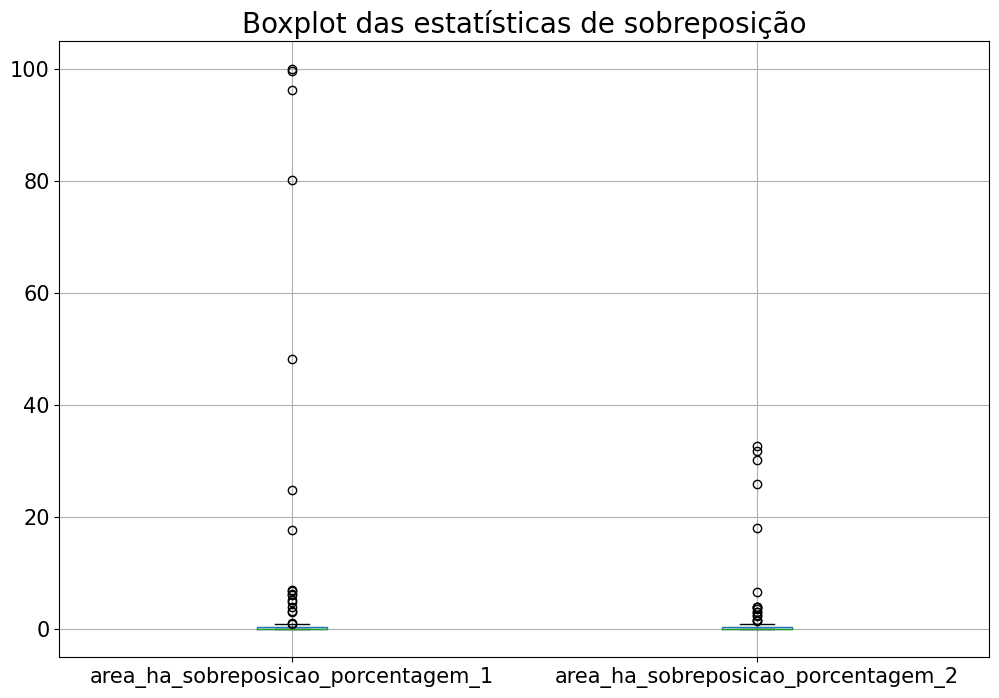

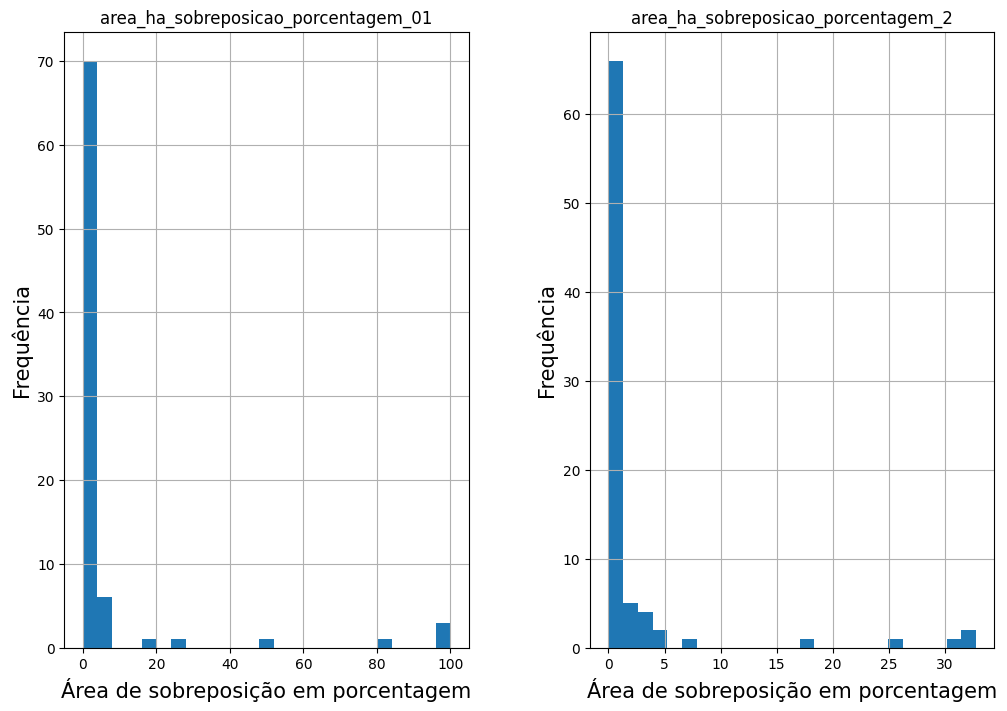

In [9]:
### Retirando estatísticas de sobreposição das colunas area_ha_soberposicao_1 ###
data_stats = data_overlaps[['area_ha_sobreposicao_porcentagem_1', 'area_ha_sobreposicao_porcentagem_2']]
data_stats_excel = data_stats.describe().round(3).to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/estatísticas_sobreposição.xlsx')
### Plotting boxplot ###
boxplot_data_stats = data_stats.boxplot(column=['area_ha_sobreposicao_porcentagem_1', 'area_ha_sobreposicao_porcentagem_2'],
                                        grid=True,
                                        figsize=(12,8),
                                        fontsize=15)
boxplot_data_stats.set_title('Boxplot das estatísticas de sobreposição', fontsize=20)
### Saving boxplot ###
boxplot_data_stats.figure.savefig('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/boxplot_data_stats.png')

### Plotting histogram of data
histogram_data_stats = data_stats.hist(bins= 25, figsize=(12,8), grid=True)
### Setting labels to x and y axis
histogram_data_stats[0][0].set_xlabel('Área de sobreposição em porcentagem', fontsize=15)
histogram_data_stats[0][0].set_ylabel('Frequência', fontsize=15)
histogram_data_stats[0][1].set_xlabel('Área de sobreposição em porcentagem', fontsize=15)
histogram_data_stats[0][1].set_ylabel('Frequência', fontsize=15)
histogram_data_stats[0][0].set_title('area_ha_sobreposicao_porcentagem_01', fontsize=12)

### Saving histogram ###
histogram_data_stats[0][0].figure.savefig('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/histogram_data_stats.png')

De acordo com a legislação (fonte: https://www.icv.org.br/drop/wp-content/uploads/2020/02/diagnostico-para-v02.pdf), sobreposições acima de 10% para propriedades pequenas e médias (abaixo de 15 Módulos fiscais) serão retiradas da amostra nesta análise:
1) Criação de coluna que quantifica se há mais de 10% de sobreposição
2) Retirar estas propriedades da amostra final

In [10]:
data_overlaps['sobreposicao_maior_10'] = data_overlaps.apply(lambda row: categories_porcentagem_sobreposicao(row), axis=1)
data_overlaps.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/sobreposicao_v01.xlsx')
#data_overlaps.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/sobreposicao_v01.shp', driver='ESRI Shapefile', crs='EPSG:4326')

data_overlaps['maiores_que_500_ha'] = data_overlaps.apply(lambda row: analisando_maiores_que_500_ha(row), axis=1)
data_overlaps.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/xlsx/sobreposicao_v02.xlsx')

### Corrigindo o formato dos dados para inteiros
data_overlaps_df = data_overlaps.astype({'farmer_cod_1': 'int', 
                                         'farmer_cod_2': 'int',
                                         'sobreposicao_maior_10' : 'int'})

### Selecionando apenas os dados que possuem sobreposição maior que 10%
data_overlaps_df = data_overlaps_df[data_overlaps_df['sobreposicao_maior_10'] == 1]

### Criando uma lista com as ocorrencias de sobreposição maior que 10%
data_overlaps_df_1 = data_overlaps_df[['farmer_cod_1']].values.tolist()
data_overlaps_df_2 = data_overlaps_df[['farmer_cod_2']].values.tolist()
data_overlaps_df = pd.concat([pd.DataFrame(data_overlaps_df_1), pd.DataFrame(data_overlaps_df_2)])
data_overlaps_df = data_overlaps_df.rename(columns={0: 'farmer_cod'})
data_overlaps_df.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/xlsx/areas_sobrepostas.xlsx')

### Possibilidade 01
1) Concatenando as propriedades com sobreposição as propriedades amostradas
2) Retirando as duplicatas

In [11]:
# Merge do dataset 
merge = pd.concat([gdf, data_overlaps_df])
merge.head(10)
#Convert the column 'is_duplica' to string 
merge = merge.astype({'is_duplica': 'str'})


# Exportando resultados parciais
merge.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/xlsx/merge_parcial_v02.xlsx', encoding='utf-8')
### Se a coluna 'n_prod' for maior que 1, não é necessário remover a propriedade
for row, col in merge.iterrows():
    if col['n_prod'] == 1:
        merge = merge.drop_duplicates(subset=['farmer_cod'], keep= False)
    else:
        pass
merge.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/xlsx/merge_teste_v03.xlsx', encoding='utf-8')
    
# Exportando resultados finais
#merge.to_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/xlsx/merge_final_v03.xlsx', encoding='utf-8')
#merge.to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/shp/merge_final_v04.shp', driver='ESRI Shapefile', crs='EPSG:4326')

Possibilidade 02

Editar arquivo diretamente, e fazer o restante normalmente 

In [53]:
### Lendo o excel sem os dados de sobreposição
from shapely import wkt
merge_df =  pd.read_excel('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v3/xlsx/merge__v03.xlsx')
merge_df['geometry'] = merge_df['geometry'].apply(wkt.loads)
merge_df = gpd.GeoDataFrame(merge_df, geometry='geometry', crs='epsg:4326')

In [59]:
### plot a histogram of the area_ha column
plot = merge['area_ha'].plot.hist(bins=100, alpha=0.5)
plot.set_xlabel('Área (ha)', fontsize=15)
plot.set_ylabel('Frequência', fontsize=15)
plot.set_title('Histograma da área das propriedades', fontsize=15)

#plot.figure.savefig('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/plots_png/histogram_area_ha.png')

Text(0.5, 1.0, 'Histograma da área das propriedades')

In [ ]:
merge[merge['area_ha'] >= 500].to_file('/home/luismellow/Documents/03_Solidaridad_Network/01_automate_propriedades_limite_restaurAmazonia/02_tratamento/v2/shp/merge_v03_maior_500ha.shp', driver='ESRI Shapefile', crs='EPSG:4326')

Normalized/laundered field name: 'overlapping' to 'overlappin'


In [61]:
print("Para um total de {} propriedades amostradas...".format(len(merge)))
df_area_sum = merge['area_ha'].sum().round(2)
print('A soma das áreas é: ', df_area_sum, 'ha')
gdf_area_avg = merge['area_ha'].mean().round(2)
print('A média das áreas é: ', gdf_area_avg, 'ha')

Para um total de 509 propriedades amostradas...
A soma das áreas é:  38704.17 ha
A média das áreas é:  76.04 ha


In [ ]:
start_time = time.time()
print('Tempo total de execução: {} minutos'.format((time.time() - start_time)/60))

In [ ]:
### Tratando dados de propriedades do CAR
# 1) selecionar os produtores com n_produtores > 1 e calcular área das propriedades (possuem mesma área e farmer_code diferentes)

# 2) Calcular área ajustada

# 3) Se n_produtores for = 1 e tiver duplicatas, retirar as duplicatas do Banco de Dados

# 4) Rodar o restante do código (mantendo os casos em que há mais de 80% de sobreposição)